In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-01-13 01:09:24--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  6.82MB/s    in 1.6s    

2024-01-13 01:09:26 (6.82 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [2]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-01-13 01:09:26--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  23.0MB/s    in 7.3s    

2024-01-13 01:09:34 (19.4 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
from zipfile import ZipFile
import os

In [4]:
with ZipFile("/content/horse-or-human.zip") as z:
  data=z.extractall("./content/horse-or-human")

In [5]:
with ZipFile("/content/validation-horse-or-human.zip","r") as z:
  file_data= z.extractall("./content/validation-horse-or-human")

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

In [7]:
train_dir= "/content/content/horse-or-human"
test_dir = "/content/content/validation-horse-or-human"

In [8]:
print(os.listdir(train_dir))

['humans', 'horses']


In [9]:
image_list= []
for root,subd,files in os.walk("/content/content"):
  for file in files:
    file_path = os.path.join(root,file)
    image_list.append(file_path)

In [10]:
image_list[0]

'/content/content/validation-horse-or-human/humans/valhuman02-17.png'

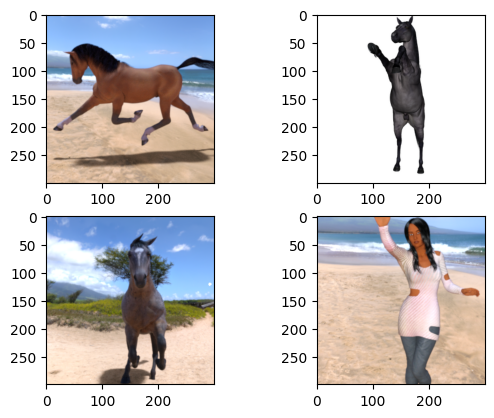

In [54]:
i= np.random.choice(image_list,1)[0]
i1= np.random.choice(image_list,1)[0]
i2= np.random.choice(image_list,1)[0]
i3= np.random.choice(image_list,1)[0]
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(plt.imread(i))
axs[0, 1].imshow(plt.imread(i2))
axs[1, 0].imshow(plt.imread(i3))
axs[1, 1].imshow(plt.imread(i1))
plt.show()

In [18]:
train_gen= ImageDataGenerator(rescale=1/255.)
valid_gen= ImageDataGenerator(rescale=1/255.)

train_generator= train_gen.flow_from_directory(train_dir,target_size=(300,300),batch_size=128,class_mode="binary",seed=42)
valid_generator= valid_gen.flow_from_directory(test_dir,target_size=(300,300),batch_size=32,class_mode="binary",shuffle=False)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [19]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

In [38]:
model = tf.keras.Sequential(

        [tf.keras.layers.Input((300,300,3)),

        tf.keras.layers.Conv2D(64,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(2),

        tf.keras.layers.Conv2D(64,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(2),

        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(2),

        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(2),

        tf.keras.layers.Conv2D(16,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(2),

        tf.keras.layers.Conv2D(16,3,activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        #tf.keras.layers.AveragePooling2D(2),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")

         ]
)

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 149, 149, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 147, 147, 64)      36928     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 73, 73, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 71, 71, 32)        18464     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 35, 35, 32)       

In [39]:
history=model.fit(train_generator,epochs=5,steps_per_epoch=8,validation_data=valid_generator,verbose=1)

Epoch 1/5
8/8 [==============================] - 11s 1s/step - loss: 0.6891 - accuracy: 0.5495 - val_loss: 0.6864 - val_accuracy: 0.6094
Epoch 2/5
8/8 [==============================] - 9s 1s/step - loss: 0.6797 - accuracy: 0.5139 - val_loss: 0.6575 - val_accuracy: 0.6016
Epoch 3/5
8/8 [==============================] - 10s 1s/step - loss: 0.5927 - accuracy: 0.7063 - val_loss: 0.5278 - val_accuracy: 0.7656
Epoch 4/5
8/8 [==============================] - 10s 1s/step - loss: 0.4243 - accuracy: 0.8262 - val_loss: 0.3086 - val_accuracy: 0.8906
Epoch 5/5
8/8 [==============================] - 9s 1s/step - loss: 0.3097 - accuracy: 0.8810 - val_loss: 0.2691 - val_accuracy: 0.9141


In [40]:
model.evaluate(valid_generator)

8/8 [==============================] - 1s 158ms/step - loss: 0.2691 - accuracy: 0.9141


[0.2690790295600891, 0.9140625]

<Axes: >

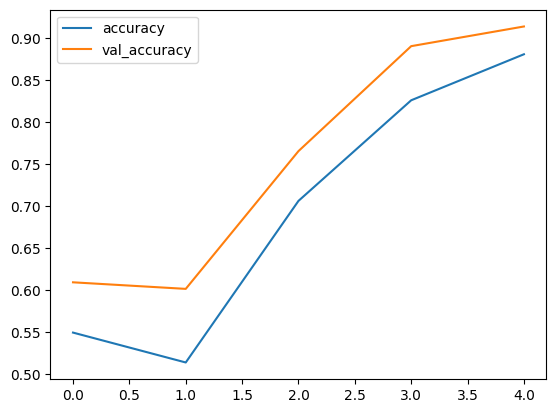

In [41]:
import pandas as pd
pd.DataFrame(history.history)[["accuracy","val_accuracy"]].plot()

In [55]:
uploaded=files.upload()
for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving thispersondoesnotexist.jpg to thispersondoesnotexist (2).jpg
1/1 [==============================] - 0s 19ms/step
[0.96385986]
thispersondoesnotexist (2).jpg is a human


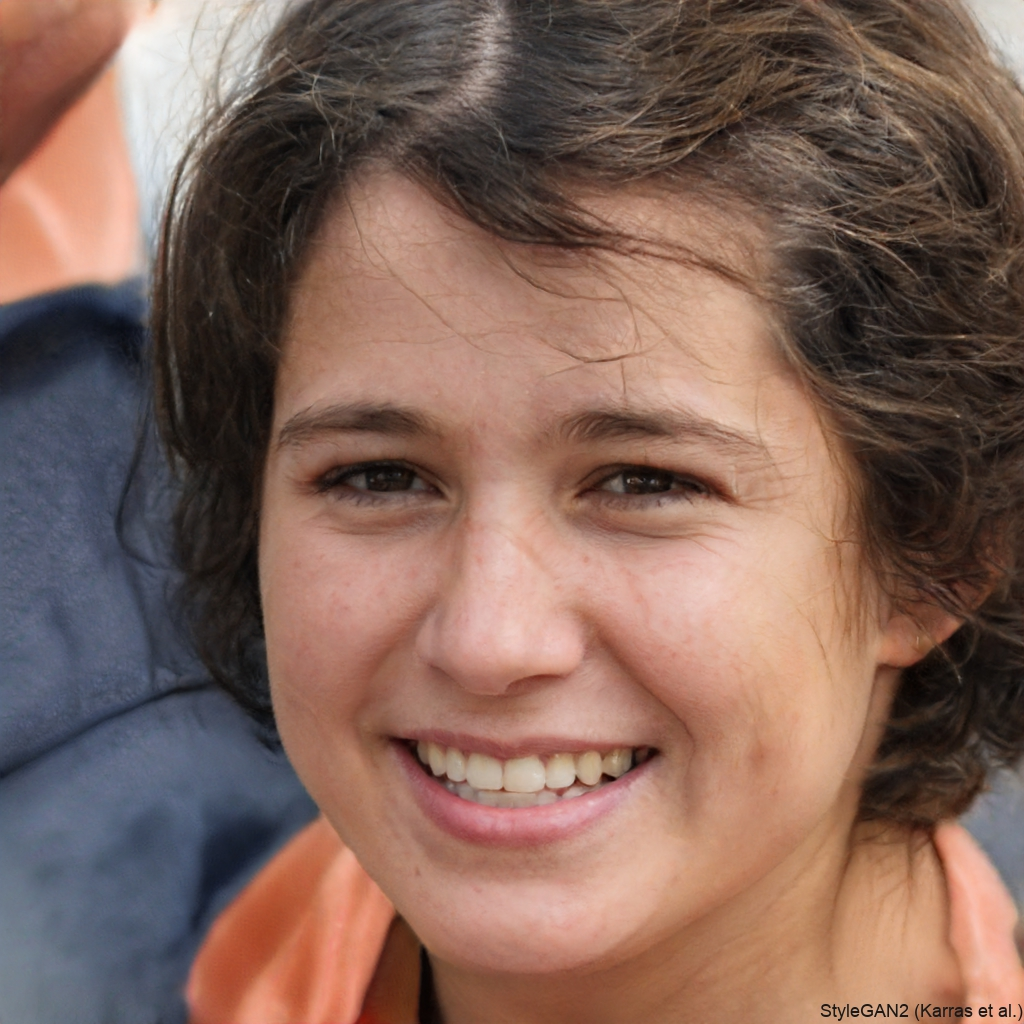

In [44]:
from PIL import Image
Image.open("/content/thispersondoesnotexist (1).jpg")

In [50]:
uploaded=files.upload()
for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving 1b0147b52e742dcf7feb42faec32843e.jpg to 1b0147b52e742dcf7feb42faec32843e.jpg
1/1 [==============================] - 0s 19ms/step
[0.24612094]
1b0147b52e742dcf7feb42faec32843e.jpg is a horse


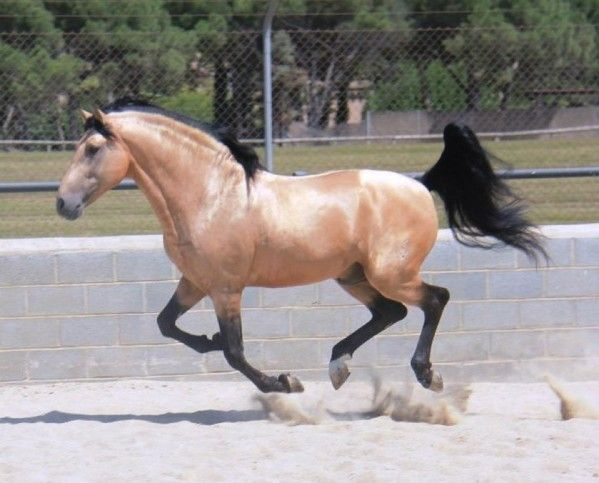

In [51]:
from PIL import Image
Image.open("/content/1b0147b52e742dcf7feb42faec32843e.jpg")